In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [2]:
# !git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

2022-11-07 12:59:51.648304: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
from tensorflow.keras.preprocessing.image import load_img

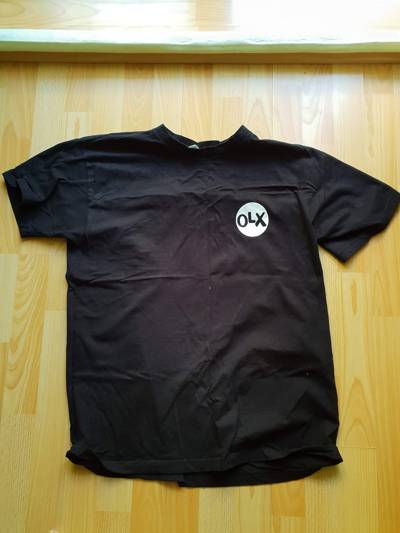

In [6]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [7]:
img = load_img(fullname, target_size=(299, 299))

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

In [9]:
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-11-07 12:59:53.659411: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 12:59:53.666735: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 12:59:53.667412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 12:59:53.668337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [12]:
X = np.array([x])

In [13]:
X.shape

(1, 299, 299, 3)

In [14]:
X = preprocess_input(X)

In [15]:
pred = model.predict(X)

2022-11-07 12:59:57.014634: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-07 12:59:57.758357: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-07 12:59:57.759277: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-07 12:59:57.759320: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-07 12:59:57.760310: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-07 12:59:57.760391: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [16]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [19]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [20]:
X, y = next(train_ds)

In [21]:
X.shape

(32, 150, 150, 3)

In [22]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
y.shape

(32, 10)

In [24]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [25]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False


inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [26]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [27]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 17s 147ms/step - loss: 1.2293 - accuracy: 0.6760 - val_loss: 0.8064 - val_accuracy: 0.7801
Epoch 2/10
96/96 [==============================] - 12s 124ms/step - loss: 0.5550 - accuracy: 0.8149 - val_loss: 0.7505 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 12s 124ms/step - loss: 0.4162 - accuracy: 0.8660 - val_loss: 0.9071 - val_accuracy: 0.7771
Epoch 4/10
96/96 [==============================] - 12s 124ms/step - loss: 0.2904 - accuracy: 0.9032 - val_loss: 0.8452 - val_accuracy: 0.7947
Epoch 5/10
96/96 [==============================] - 12s 125ms/step - loss: 0.1829 - accuracy: 0.9358 - val_loss: 0.8374 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 12s 124ms/step - loss: 0.1202 - accuracy: 0.9596 - val_loss: 0.8468 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 12s 124ms/step - loss: 0.0800 - accuracy: 0.9752 - val_loss: 0.7569 - val_accuracy: 0.8240

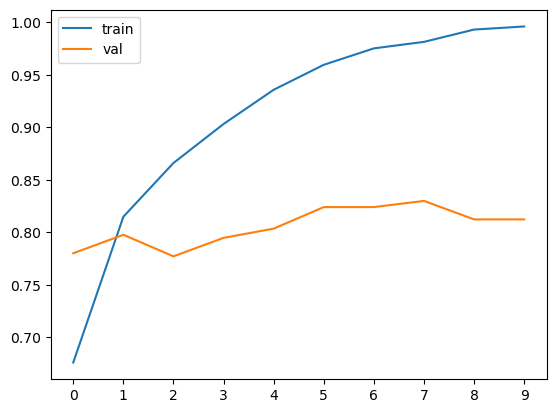

In [28]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend();

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [29]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [30]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 15s 133ms/step - loss: 1.8775 - accuracy: 0.3787 - val_loss: 1.5919 - val_accuracy: 0.4575
Epoch 2/10
96/96 [==============================] - 12s 124ms/step - loss: 1.3529 - accuracy: 0.5808 - val_loss: 1.2644 - val_accuracy: 0.5894
Epoch 3/10
96/96 [==============================] - 12s 123ms/step - loss: 1.1233 - accuracy: 0.6486 - val_loss: 1.0842 - val_accuracy: 0.6716
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.9887 - accuracy: 0.6907 - val_loss: 0.9705 - val_accuracy: 0.7155
Epoch 5/10
96/96 [==============================] - 12s 124ms/step - loss: 0.8986 - accuracy: 0.7187 - val_loss: 0.8998 - val_accuracy: 0.7419
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.8319 - accuracy: 0.7357 - val_loss: 0.8481 - val_accuracy: 0.7478
Epoch 7/10
96/96 [==============================] - 12s 122ms/step - loss: 0.7803 - accuracy: 0.7493 - val_loss: 0.8091 - val_accuracy:

In [31]:
del scores[0.1]
del scores[0.0001]

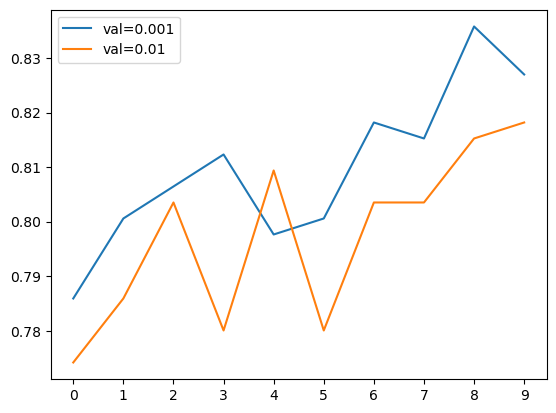

In [32]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [33]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [34]:
model.save_weights('model_v1.h5', save_format='h5')

In [36]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [37]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 15s 133ms/step - loss: 1.0956 - accuracy: 0.6346 - val_loss: 0.7488 - val_accuracy: 0.7537
Epoch 2/10
96/96 [==============================] - 12s 127ms/step - loss: 0.6381 - accuracy: 0.7846 - val_loss: 0.6212 - val_accuracy: 0.8006
Epoch 3/10
96/96 [==============================] - 12s 126ms/step - loss: 0.5215 - accuracy: 0.8237 - val_loss: 0.5759 - val_accuracy: 0.8240
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.4302 - accuracy: 0.8576 - val_loss: 0.5604 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3785 - accuracy: 0.8814 - val_loss: 0.5421 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 12s 123ms/step - loss: 0.3319 - accuracy: 0.9032 - val_loss: 0.5306 - val_accuracy: 0.8123
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.2912 - accuracy: 0.9205 - val_loss: 0.5383 - val_accuracy: 0.8211

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [38]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [39]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 15s 131ms/step - loss: 1.5291 - accuracy: 0.4811 - val_loss: 1.0838 - val_accuracy: 0.6540
Epoch 2/10
96/96 [==============================] - 12s 122ms/step - loss: 0.9100 - accuracy: 0.6969 - val_loss: 0.8044 - val_accuracy: 0.7419
Epoch 3/10
96/96 [==============================] - 12s 121ms/step - loss: 0.6670 - accuracy: 0.7846 - val_loss: 0.7063 - val_accuracy: 0.7654
Epoch 4/10
96/96 [==============================] - 12s 122ms/step - loss: 0.5358 - accuracy: 0.8217 - val_loss: 0.6533 - val_accuracy: 0.7713
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.4510 - accuracy: 0.8585 - val_loss: 0.6391 - val_accuracy: 0.7918
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3923 - accuracy: 0.8817 - val_loss: 0.6246 - val_accuracy: 0.7918
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.3396 - accuracy: 0.9012 - val_loss: 0.6148 - val_accuracy: 0.7

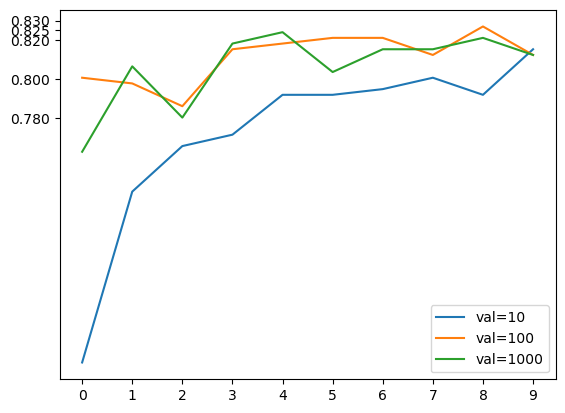

In [40]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [41]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [42]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 15s 134ms/step - loss: 0.9483 - accuracy: 0.6754 - val_loss: 0.6456 - val_accuracy: 0.7771
Epoch 2/30
96/96 [==============================] - 12s 122ms/step - loss: 0.5076 - accuracy: 0.8237 - val_loss: 0.5915 - val_accuracy: 0.8006
Epoch 3/30
96/96 [==============================] - 12s 122ms/step - loss: 0.3492 - accuracy: 0.8866 - val_loss: 0.5843 - val_accuracy: 0.7977
Epoch 4/30
96/96 [==============================] - 11s 119ms/step - loss: 0.2471 - accuracy: 0.9228 - val_loss: 0.5135 - val_accuracy: 0.8299
Epoch 5/30
96/96 [==============================] - 12s 121ms/step - loss: 0.1777 - accuracy: 0.9511 - val_loss: 0.5776 - val_accuracy: 0.8065
Epoch 6/30
96/96 [==============================] - 12s 120ms/step - loss: 0.1347 - accuracy: 0.9648 - val_loss: 0.5716 - val_accuracy: 0.8152
Epoch 7/30
96/96 [==============================] - 12s 120ms/step - loss: 0.0886 - accuracy: 0.9857 - val_loss: 0.6033 - val_accuracy: 0.

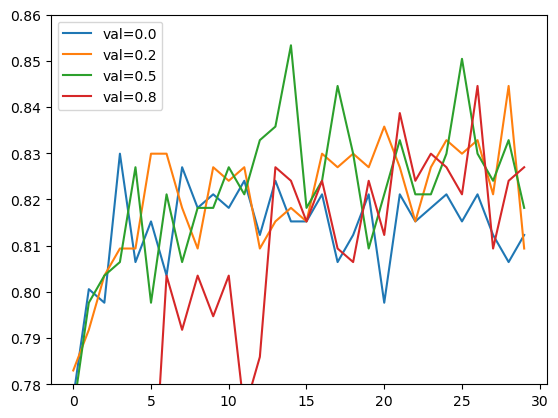

In [43]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

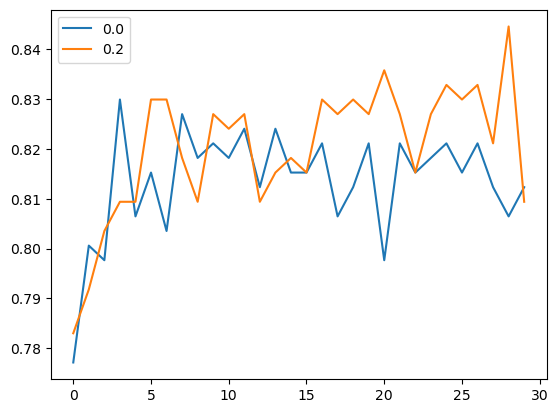

In [44]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [45]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [46]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 16s 134ms/step - loss: 1.0589 - accuracy: 0.6385 - val_loss: 0.6634 - val_accuracy: 0.7742
Epoch 2/50
96/96 [==============================] - 12s 122ms/step - loss: 0.6119 - accuracy: 0.7865 - val_loss: 0.5872 - val_accuracy: 0.8035
Epoch 3/50
96/96 [==============================] - 12s 123ms/step - loss: 0.4686 - accuracy: 0.8276 - val_loss: 0.5898 - val_accuracy: 0.8035
Epoch 4/50
96/96 [==============================] - 12s 124ms/step - loss: 0.3608 - accuracy: 0.8797 - val_loss: 0.5641 - val_accuracy: 0.8094
Epoch 5/50
96/96 [==============================] - 12s 123ms/step - loss: 0.2648 - accuracy: 0.9143 - val_loss: 0.5802 - val_accuracy: 0.7918
Epoch 6/50
96/96 [==============================] - 12s 123ms/step - loss: 0.2184 - accuracy: 0.9348 - val_loss: 0.5868 - val_accuracy: 0.8299
Epoch 7/50
96/96 [==============================] - 12s 123ms/step - loss: 0.1834 - accuracy: 0.9417 - val_loss: 0.6039 - val_accuracy: 0.8123

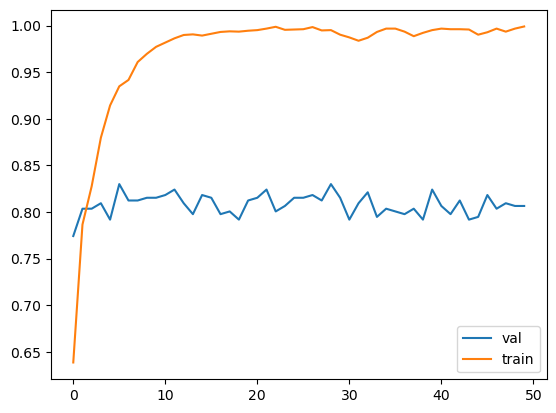

In [47]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [49]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [50]:
input_size = 299

In [51]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [52]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [54]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 71s 711ms/step - loss: 0.8382 - accuracy: 0.7161 - val_loss: 0.4734 - val_accuracy: 0.8534
Epoch 2/50
96/96 [==============================] - 67s 698ms/step - loss: 0.4592 - accuracy: 0.8458 - val_loss: 0.4268 - val_accuracy: 0.8710
Epoch 3/50
96/96 [==============================] - 67s 698ms/step - loss: 0.3790 - accuracy: 0.8709 - val_loss: 0.3987 - val_accuracy: 0.8680
Epoch 4/50
96/96 [==============================] - 66s 690ms/step - loss: 0.3290 - accuracy: 0.8902 - val_loss: 0.3768 - val_accuracy: 0.8504
Epoch 5/50
96/96 [==============================] - 66s 681ms/step - loss: 0.3097 - accuracy: 0.8928 - val_loss: 0.3566 - val_accuracy: 0.8680
Epoch 6/50
96/96 [==============================] - 67s 696ms/step - loss: 0.2858 - accuracy: 0.9029 - val_loss: 0.3512 - val_accuracy: 0.9003
Epoch 7/50
96/96 [==============================] - 67s 695ms/step - loss: 0.2524 - accuracy: 0.9149 - val_loss: 0.3896 - val_accuracy: 0.8622

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [55]:
import tensorflow as tf
from tensorflow import keras

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [57]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [58]:
model = keras.models.load_model('xception_v4_1_06_0.900.h5')

In [59]:
model.evaluate(test_ds)

12/12 [==============================] - 4s 288ms/step - loss: 0.2588 - accuracy: 0.9086


[0.25881171226501465, 0.9086021780967712]

In [60]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [61]:
img = load_img(path, target_size=(299, 299))

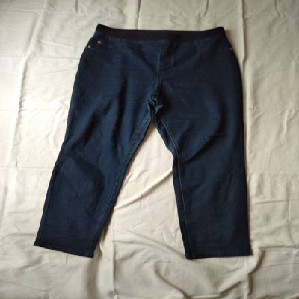

In [62]:
img

In [63]:
import numpy as np

In [64]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [65]:
X = preprocess_input(X)

In [66]:
pred = model.predict(X)

1/1 [==============================] - 1s 622ms/step


In [67]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [68]:
dict(zip(classes, pred[0]))

{'dress': -2.2804723,
 'hat': -5.1659775,
 'longsleeve': -1.1836277,
 'outwear': -0.92920506,
 'pants': 9.67458,
 'shirt': -1.8971065,
 'shoes': -2.5477877,
 'shorts': 4.8222747,
 'skirt': -2.5146267,
 't-shirt': -1.7466732}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

